# Agent Based Model: Main Notebook

In [92]:
import numpy.random as rnd
import pandas as pd 
from matplotlib import pyplot as plt

#### Workflow Notes 
* Draw Students with values within the four dimensions 
* Function that creates a study group (draw 4 students) -> Measure homogeniety 
* Task 


In [86]:
def n_sampler(size):
    max_vals = []
    min_vals = []

    beta_dist = rnd.beta(5, 5, size)

    for i in range(size):
        if beta_dist[i] >= 0.5:
            max_vals.append(beta_dist[i])
        else:
            min_vals.append(beta_dist[i])
    
    return max_vals, min_vals

max_vals, min_vals = n_sampler(1000)

In [87]:
class Student():
    def __init__(self, ID, Ex, Se, Th, Ju):
        self.ID  = ID
        self.Ex = Ex #Extraversion vs Introversion dimension
        self.Se = Se #Sensing vs Intuition dimension
        self.Th = Th #Thinking vs Feeling dimension
        self.Ju = Ju #Judging vs Perceiving dimension

    def Extraversion(self):
        if self.Ex == "E":
            self.ExScore = max_vals[0]
            del max_vals[0]
            return self.ExScore
        else:
            self.ExScore = min_vals[0]
            del min_vals[0]
            return self.ExScore

    def Sensing(self):
        return 2
    
    def Thinking(self):
        return 3
    
    def Judging(self):
        return 4

In [88]:
def StudyGroup(student_list):
    studygroup = []

    for i in range(len(student_list)):
        student = Student(i, student_list[i][0], student_list[i][1], student_list[i][2], student_list[i][3])
        studygroup.append(student)
    
    return studygroup

def data_collect(studygroup, student_list):
    ID_list = []
    extraversion_list = []
    sensing_list = []
    thinking_list = []
    judging_list = []

    for student in studygroup:
        ID_list.append(student.ID)
        extraversion_list.append(student.Extraversion())
        sensing_list.append(student.Sensing()) 
        thinking_list.append(student.Thinking())
        judging_list.append(student.Judging())
    
    data = pd.DataFrame({'ID': ID_list, 
                        'name': student_list, 
                        'E/I': extraversion_list, 
                        'S/N': sensing_list,
                        'T/F': thinking_list,
                        'J/P': judging_list})

    return data

In [89]:
student_list_test = ["ESTJ", "ISTJ", "ENTP", "INFJ"]

studygroup1 = StudyGroup(student_list_test)

df_studygroup1 = data_collect(studygroup1, student_list_test)

print(df_studygroup1)


   ID  name       E/I  S/N  T/F  J/P
0   0  ESTJ  0.599853    2    3    4
1   1  ISTJ  0.497666    2    3    4
2   2  ENTP  0.610648    2    3    4
3   3  INFJ  0.287038    2    3    4


In [90]:
student_list_test_2 = ["ESTJ", "ISTJ", "ENTP", "INFJ"]

studygroup2 = StudyGroup(student_list_test_2)

df_studygroup2 = data_collect(studygroup2, student_list_test_2)

print(df_studygroup2)

   ID  name       E/I  S/N  T/F  J/P
0   0  ESTJ  0.610426    2    3    4
1   1  ISTJ  0.426047    2    3    4
2   2  ENTP  0.618177    2    3    4
3   3  INFJ  0.237993    2    3    4


(array([  6.,  27.,  82., 143., 197., 184., 165., 114.,  62.,  20.]),
 array([0.07893078, 0.15890796, 0.23888513, 0.31886231, 0.39883948,
        0.47881666, 0.55879383, 0.638771  , 0.71874818, 0.79872535,
        0.87870253]),
 <BarContainer object of 10 artists>)

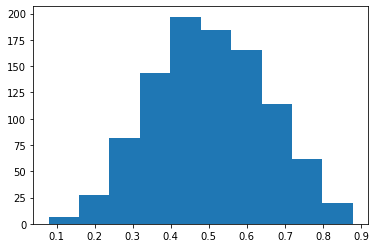

In [93]:
plt.hist(rnd.beta(5,5,1000))